In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [9]:
df_1 = pd.read_csv("data/StressLevelDataset.csv")
df_2 = pd.read_csv("data/Stress_Dataset.csv")

print("Shape :", df_1.shape)
df_1.info()

Shape : (1100, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load    

In [11]:
df_1.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [13]:
print("Shape :", df_2.shape)
df_2.info()

Shape : (843, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 26 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Gender                                                                843 non-null    int64 
 1   Age                                                                   843 non-null    int64 
 2   Have you recently experienced stress in your life?                    843 non-null    int64 
 3   Have you noticed a rapid heartbeat or palpitations?                   843 non-null    int64 
 4   Have you been dealing with anxiety or tension recently?               843 non-null    int64 
 5   Do you face any sleep problems or difficulties falling asleep?        843 non-null    int64 
 6   Have you been dealing with anxiety or tension recently?.1             843 non-null    in

In [15]:
df_2.head()

,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?,Which type of stress do you primarily experience?
0,0,20,3,4,2,5,1,2,1,2,...,3,1,4,1,2,1,3,1,2,Eustress (Positive Stress) - Stress that motiv...
1,0,20,2,3,2,1,1,1,1,4,...,3,2,1,1,3,2,1,4,2,Eustress (Positive Stress) - Stress that motiv...
2,0,20,5,4,2,2,1,3,4,2,...,2,2,2,1,4,1,1,2,1,Eustress (Positive Stress) - Stress that motiv...
3,1,20,3,4,3,2,2,3,4,3,...,1,1,2,1,2,1,1,5,3,Eustress (Positive Stress) - Stress that motiv...
4,0,20,3,3,3,2,2,4,4,4,...,2,3,1,2,2,4,2,2,2,Eustress (Positive Stress) - Stress that motiv...


In [17]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
anxiety_level,1100.0,11.063636,6.117558,0.0,6.0,11.0,16.0,21.0
self_esteem,1100.0,17.777273,8.944599,0.0,11.0,19.0,26.0,30.0
mental_health_history,1100.0,0.492727,0.500175,0.0,0.0,0.0,1.0,1.0
depression,1100.0,12.555455,7.727008,0.0,6.0,12.0,19.0,27.0
headache,1100.0,2.508182,1.409356,0.0,1.0,3.0,3.0,5.0
blood_pressure,1100.0,2.181818,0.833575,1.0,1.0,2.0,3.0,3.0
sleep_quality,1100.0,2.660000,1.548383,0.0,1.0,2.5,4.0,5.0
breathing_problem,1100.0,2.753636,1.400713,0.0,2.0,3.0,4.0,5.0
noise_level,1100.0,2.649091,1.328127,0.0,2.0,3.0,3.0,5.0
living_conditions,1100.0,2.518182,1.119208,0.0,2.0,2.0,3.0,5.0


In [19]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,843.0,0.349941,0.477234,0.0,0.0,0.0,1.0,1.0
Age,843.0,20.071174,5.429502,14.0,19.0,19.0,20.0,100.0
Have you recently experienced stress in your life?,843.0,2.997628,1.134639,1.0,2.0,3.0,4.0,5.0
Have you noticed a rapid heartbeat or palpitations?,843.0,2.755635,1.118650,1.0,2.0,3.0,4.0,5.0
Have you been dealing with anxiety or tension recently?,843.0,2.543298,1.201330,1.0,2.0,2.0,3.0,5.0
Do you face any sleep problems or difficulties falling asleep?,843.0,2.786477,1.266959,1.0,2.0,3.0,4.0,5.0
Have you been dealing with anxiety or tension recently?.1,843.0,2.663108,1.266376,1.0,2.0,2.0,4.0,5.0
Have you been getting headaches more often than usual?,843.0,2.628707,1.266593,1.0,2.0,2.0,4.0,5.0
Do you get irritated easily?,843.0,2.702254,1.314213,1.0,2.0,3.0,4.0,5.0
Do you have trouble concentrating on your academic tasks?,843.0,2.699881,1.313673,1.0,2.0,3.0,4.0,5.0


In [21]:
print(df_1['stress_level'].value_counts())
print(df_2['Which type of stress do you primarily experience?'].value_counts())

stress_level
0    373
2    369
1    358
Name: count, dtype: int64
Which type of stress do you primarily experience?
Eustress (Positive Stress) - Stress that motivates and enhances performance.       768
No Stress - Currently experiencing minimal to no stress.                            43
Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.     32
Name: count, dtype: int64


In [23]:
cols_of_interest = ["anxiety_level", "self_esteem", "mental_health_history", "depression"]

for col in cols_of_interest:
    uniques = df_1[col].unique()
    print(f"\n--- {col} ---")
    print("Unique values (sample):", uniques[:15]) 
    print("Count of unique values:", len(uniques))
    print("Min:", df_1[col].min(), "| Max:", df_1[col].max())


--- anxiety_level ---
Unique values (sample): [14 15 12 16 20  4 17 13  6  5  9  2 11  7 21]
Count of unique values: 22
Min: 0 | Max: 21

--- self_esteem ---
Unique values (sample): [20  8 18 12 28 13 26  3 22 15 23 21 25  1 27]
Count of unique values: 31
Min: 0 | Max: 30

--- mental_health_history ---
Unique values (sample): [0 1]
Count of unique values: 2
Min: 0 | Max: 1

--- depression ---
Unique values (sample): [11 15 14  7 21  6 22 12 27 25  8 24  3  1  0]
Count of unique values: 28
Min: 0 | Max: 27


Unique Age values: [14, 15, 17, 18, 19, 20, 21, 22, 24, 28, 32, 36, 37, 41, 100]
Min: 14 | Max: 100


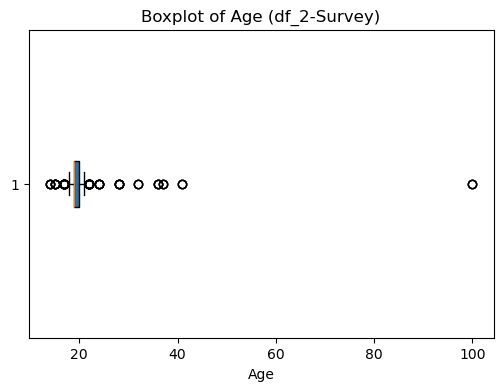

In [25]:
print("Unique Age values:", sorted(df_2["Age"].unique()))
print("Min:", df_2["Age"].min(), "| Max:", df_2["Age"].max())

plt.figure(figsize=(6,4))
plt.boxplot(df_2["Age"], vert=False, patch_artist=True)
plt.title("Boxplot of Age (df_2-Survey)")
plt.xlabel("Age")
plt.show()

In [26]:
df_2 = df_2[df_2["Age"] <= 60]
df_2.shape

(840, 26)

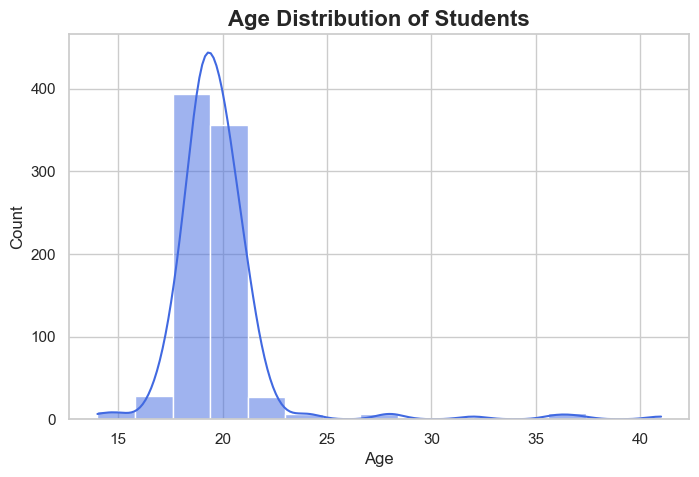

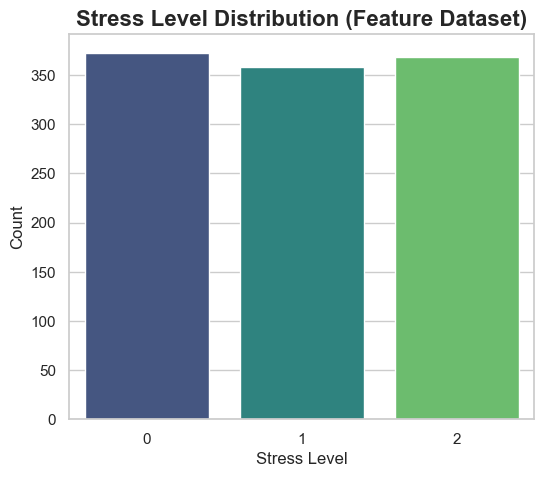

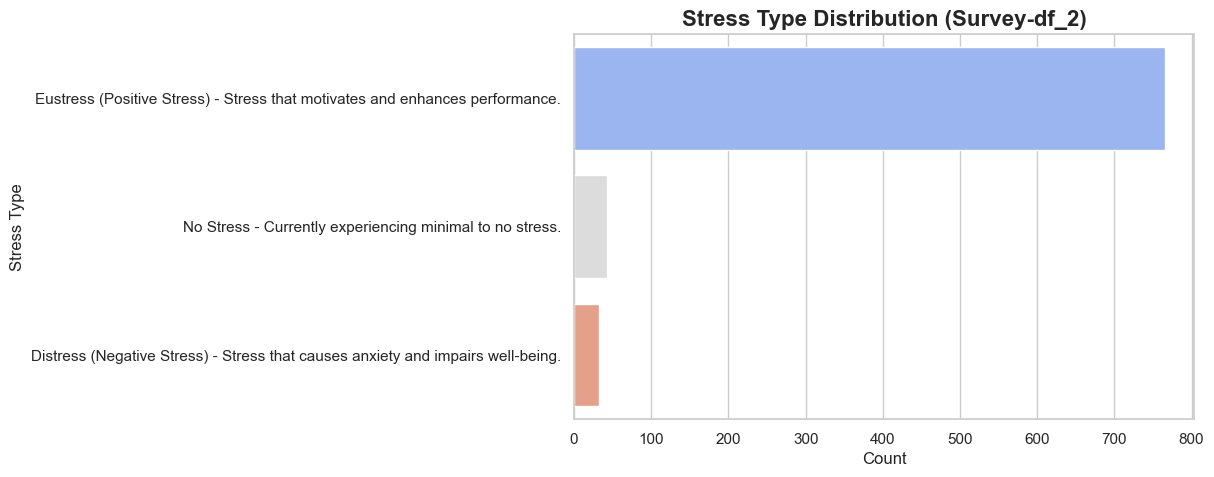

In [29]:
warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid", palette="muted")

# --- 1. Age distribution ---
plt.figure(figsize=(8,5))
sns.histplot(df_2["Age"], bins=15, kde=True, color="royalblue")
plt.title("Age Distribution of Students", fontsize=16, weight="bold")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# --- 2. Stress level distribution (df_1) ---
plt.figure(figsize=(6,5))
sns.countplot(x="stress_level", data=df_1, palette="viridis")
plt.title("Stress Level Distribution (Feature Dataset)", fontsize=16, weight="bold")
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.show()

# --- 3. Stress type distribution (df_2) ---
plt.figure(figsize=(8,5))
sns.countplot(y="Which type of stress do you primarily experience?", 
              data=df_2, order=df_2["Which type of stress do you primarily experience?"].value_counts().index,
              palette="coolwarm")
plt.title("Stress Type Distribution (Survey-df_2)", fontsize=16, weight="bold")
plt.xlabel("Count")
plt.ylabel("Stress Type")
plt.show()

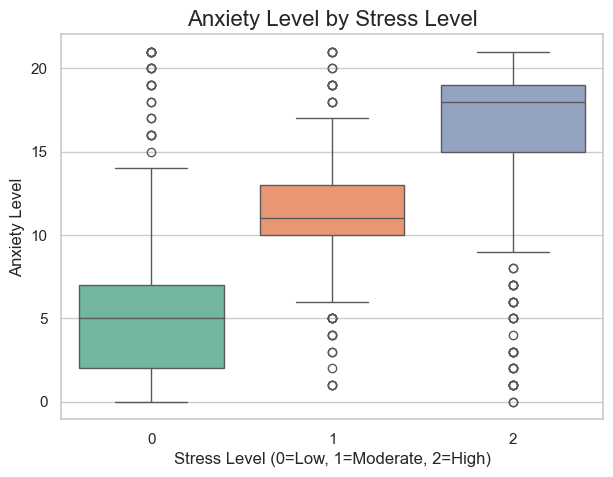

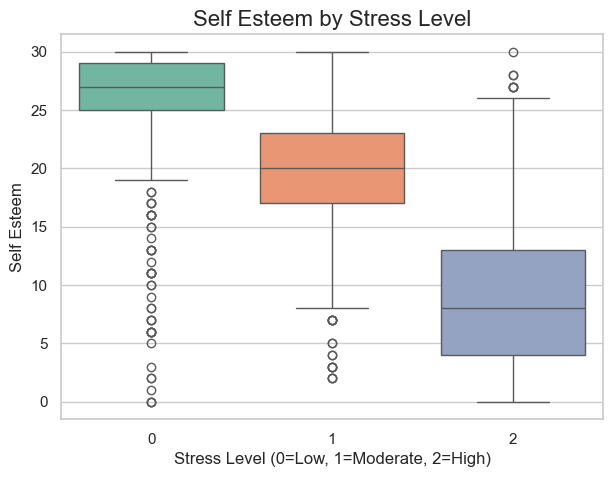

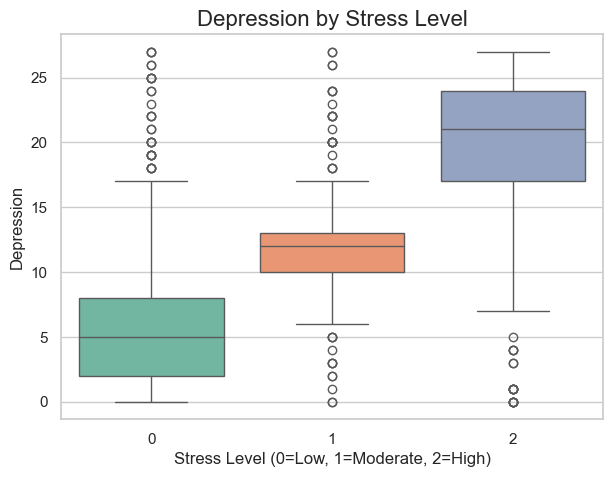

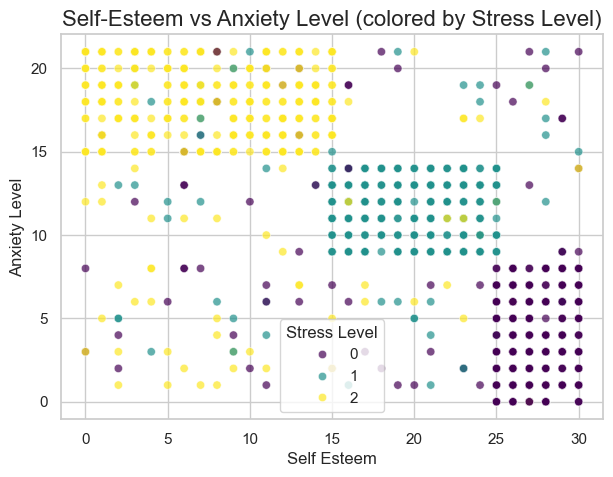

In [108]:
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams.update({'figure.figsize':(8,5), 'axes.titlesize':16, 'axes.labelsize':12})

psych_cols = ["anxiety_level", "self_esteem", "depression"]
for col in psych_cols:
    plt.figure(figsize=(7,5))
    sns.boxplot(x="stress_level", y=col, data=df_1, palette="Set2")
    plt.title(f"{col.replace('_',' ').title()} by Stress Level")
    plt.xlabel("Stress Level (0=Low, 1=Moderate, 2=High)")
    plt.ylabel(col.replace("_"," ").title())
    plt.show()

# ---Correlation Heatmap (df_1) ---
#plt.figure(figsize=(12,8))
#corr = df_1.corr()
#sns.heatmap(corr, cmap="coolwarm", annot=False, cbar=True)
#plt.title("Correlation Heatmap (df_1)", fontsize=18, weight="bold")
#plt.show()

# ---Scatterplot Example ---
plt.figure(figsize=(7,5))
sns.scatterplot(x="self_esteem", y="anxiety_level", 
                hue="stress_level", palette="viridis", data=df_1, alpha=0.7)
plt.title("Self-Esteem vs Anxiety Level (colored by Stress Level)")
plt.xlabel("Self Esteem")
plt.ylabel("Anxiety Level")
plt.legend(title="Stress Level")
plt.show()

In [31]:
#-Correlation Heatmap (df_1)
#Strong positive correlations were observed between:
#anxiety_level and depression
#peer_pressure and bullying
#study_load and future_career_concerns
#Strong negative correlation:
#self_esteem is inversely related to both anxiety_level and depression.
#→ Students with lower self-esteem tend to report higher anxiety and depression.
#stress_level shows consistent positive correlations with most risk factors (anxiety, depression, bullying, peer pressure) and negative with protective factors (e.g., self-esteem, social support).

#-Self-Esteem vs Anxiety Level (Scatterplot)
#Clear separation by stress level:
#Low stress (0) → clustered at higher self-esteem and lower anxiety.
#Moderate stress (1) → in the middle ranges of both.
#High stress (2) → clustered at low self-esteem and high anxiety.
#This confirms that self-esteem and anxiety are two of the strongest psychological predictors of stress level.


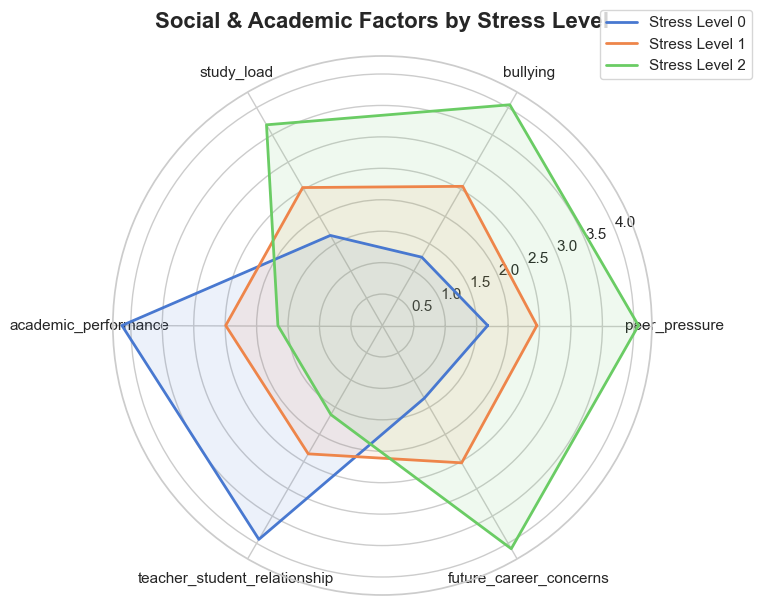

In [32]:
social_academic_cols = ["peer_pressure", "bullying", "study_load",
                        "academic_performance", "teacher_student_relationship", "future_career_concerns"]
avg_by_stress_social_academic = df_1.groupby("stress_level")[social_academic_cols].mean()

def make_radar_chart(data, categories, title):
    N = len(categories)
    angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
    angles += angles[:1] 

    fig, ax = plt.subplots(figsize=(7,7), subplot_kw=dict(polar=True))

    for level, row in data.iterrows():
        values = row.tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, label=f"Stress Level {level}")
        ax.fill(angles, values, alpha=0.1)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=11)
    ax.set_title(title, size=16, weight="bold", pad=20)
    ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))
    plt.show()

make_radar_chart(avg_by_stress_social_academic, social_academic_cols, 
                 "Social & Academic Factors by Stress Level")


In [34]:
# Social & Academic Factors
#High stress (Level 2) students report much higher levels of:
#Peer Pressure and Bullying
#Study Load and Future Career Concerns
#Low stress (Level 0) students show:
#Better Academic Performance
#Stronger Teacher–Student Relationships
#Interpretation: Social and academic environments are critical drivers of stress.
#Students who feel pressured, bullied, or overloaded are far more likely to be highly stressed.

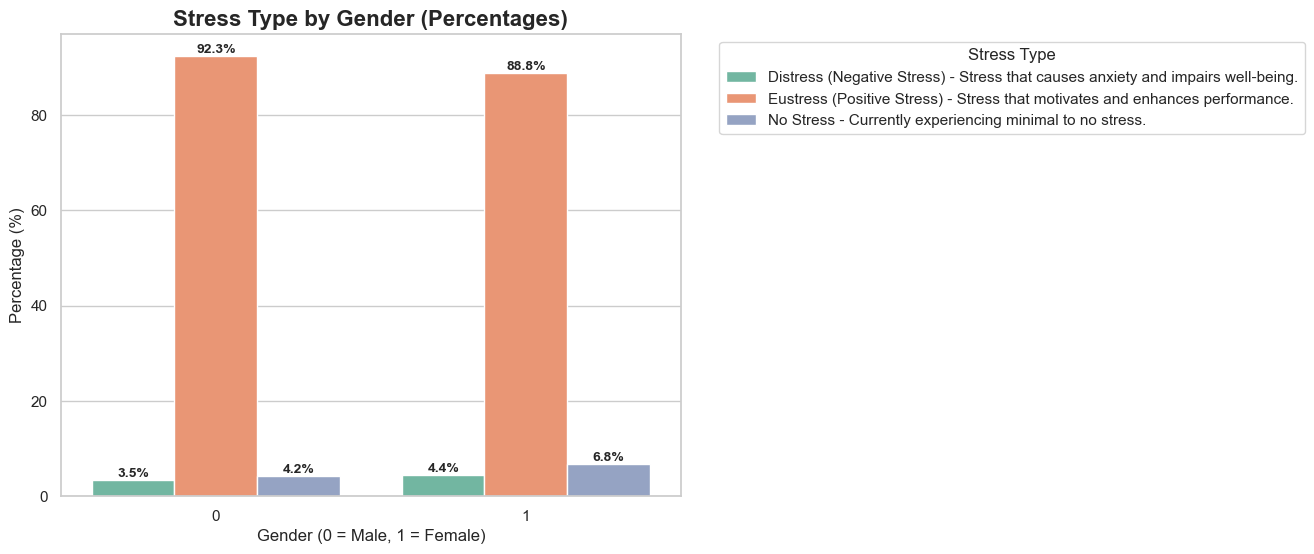

In [35]:
gender_stress_counts = (
    df_2.groupby(["Gender", "Which type of stress do you primarily experience?"])
    .size()
    .reset_index(name="count")
)
gender_totals = gender_stress_counts.groupby("Gender")["count"].transform("sum")
gender_stress_counts["percentage"] = (gender_stress_counts["count"] / gender_totals) * 100

# Plot as percentage
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,6))
sns.barplot(
    data=gender_stress_counts,
    x="Gender",
    y="percentage",
    hue="Which type of stress do you primarily experience?",
    palette="Set2"
)
plt.title("Stress Type by Gender (Percentages)", fontsize=16, weight="bold")
plt.xlabel("Gender (0 = Male, 1 = Female)")
plt.ylabel("Percentage (%)")
plt.legend(title="Stress Type", bbox_to_anchor=(1.05, 1), loc="upper left")

for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.gca().annotate(f'{height:.1f}%', 
                           (p.get_x() + p.get_width()/2., height), 
                           ha='center', va='bottom', fontsize=10, weight="bold")

plt.show()

<Figure size 1000x600 with 0 Axes>

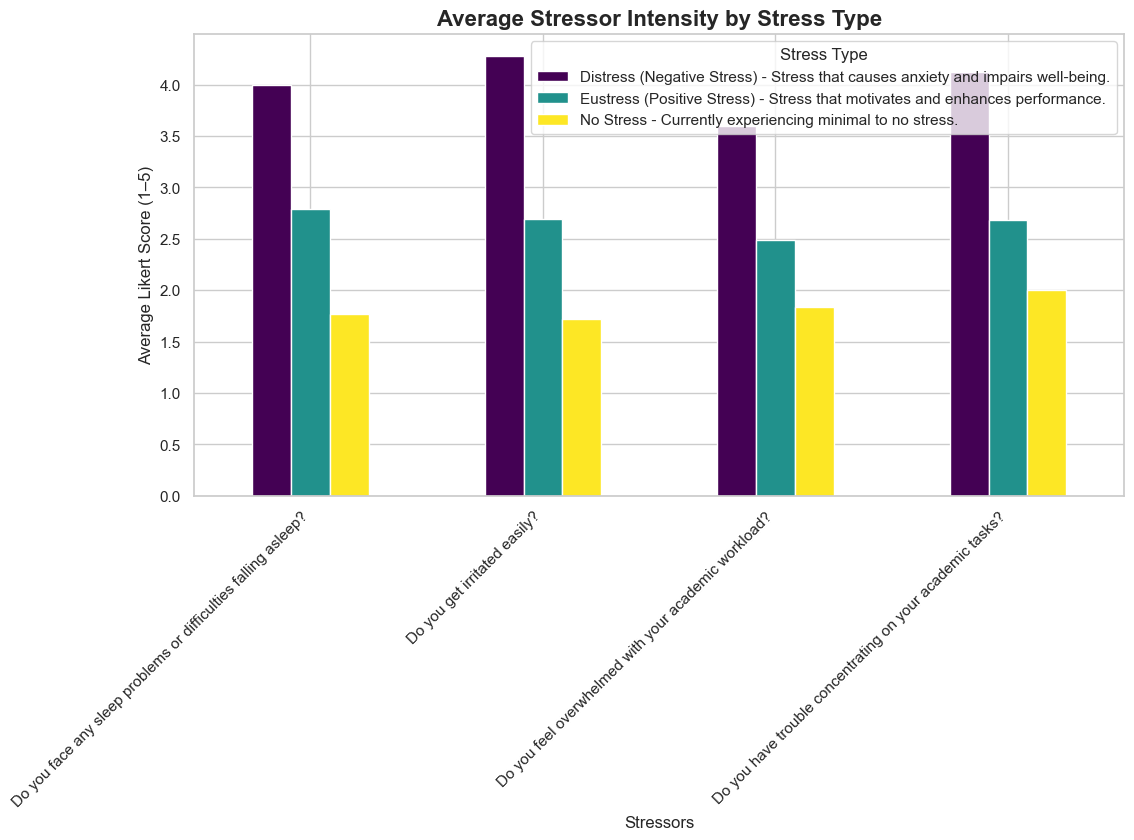

In [36]:
stressors = [
    "Do you face any sleep problems or difficulties falling asleep?",
    "Do you get irritated easily?",
    "Do you feel overwhelmed with your academic workload?",
    "Do you have trouble concentrating on your academic tasks?"
]
avg_stressors = df_2.groupby("Which type of stress do you primarily experience?")[stressors].mean().T

plt.figure(figsize=(10,6))
avg_stressors.plot(kind="bar", figsize=(12,6), colormap="viridis")
plt.title("Average Stressor Intensity by Stress Type", fontsize=16, weight="bold")
plt.ylabel("Average Likert Score (1–5)")
plt.xlabel("Stressors")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Stress Type")
plt.show()

# Heatmap of Correlations

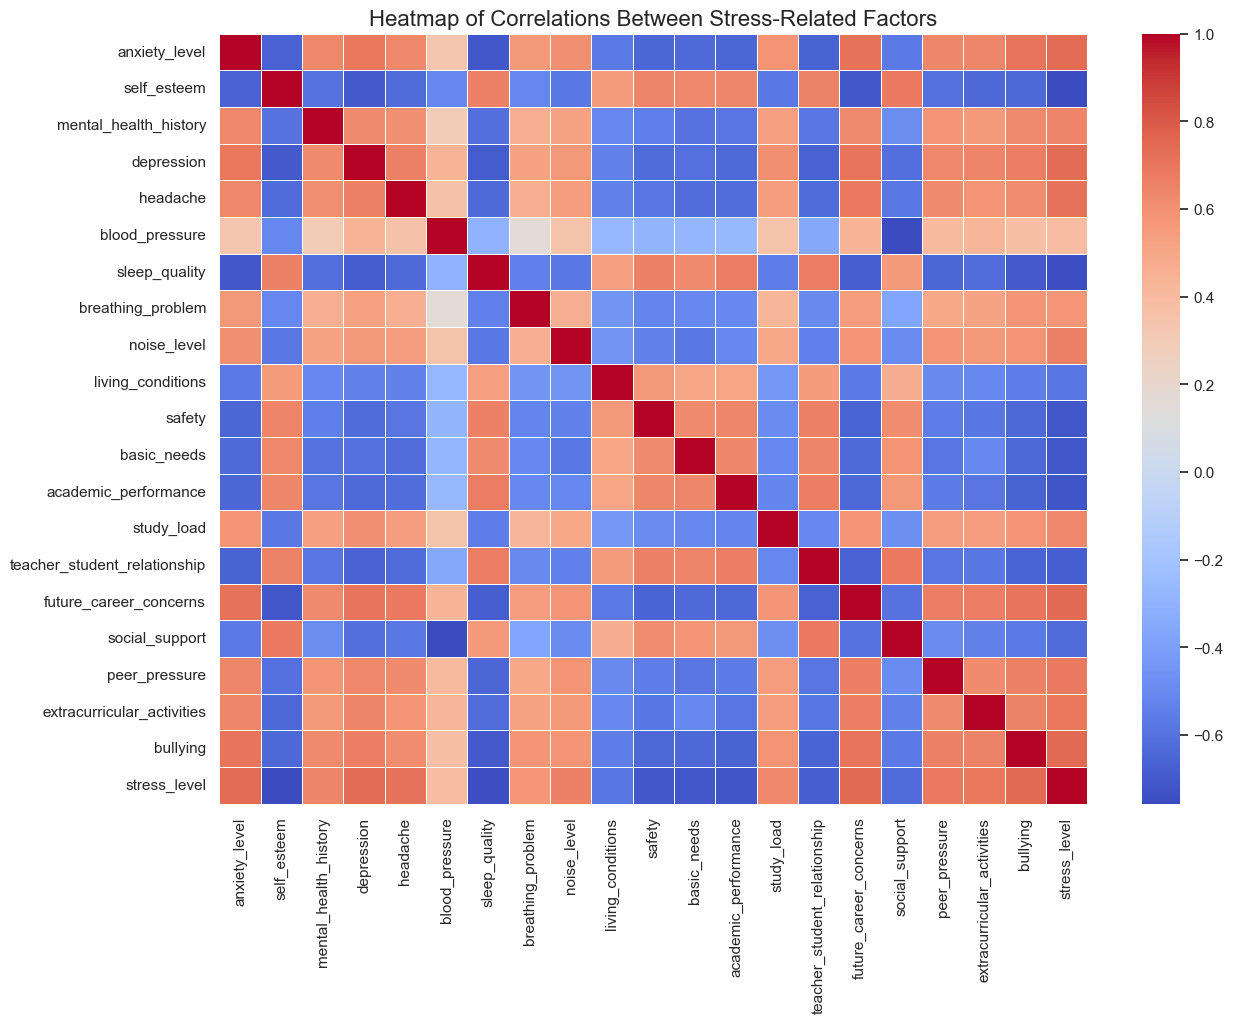

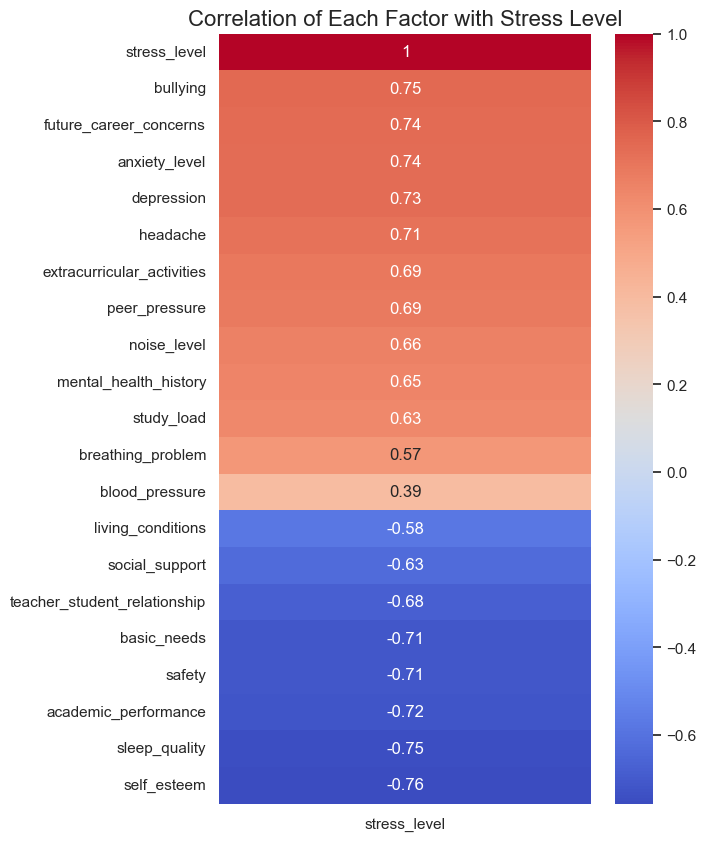

In [110]:
matrix = df_1.corr(method="pearson")
matrix
plt.figure(figsize=(14, 10))
sns.heatmap(matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Correlations Between Stress-Related Factors")
plt.show()

stress_corr = corr_matrix['stress_level'].sort_values(ascending=False)
stress_corr

plt.figure(figsize=(6, 10))
sns.heatmap(stress_corr.to_frame(), annot=True, cmap="coolwarm")
plt.title("Correlation of Each Factor with Stress Level")
plt.show()

# T-Test for High-Impact Stress Factors

In [252]:
df = df_1  
ttest_factors = {
    "Sleep Quality (Poor vs Good)": ("sleep_quality", [1,2], [4,5]),
    "Bullying (Low vs High)": ("bullying", [1,2], [4,5]),
    "Career Concerns (Low vs High)": ("future_career_concerns", [1,2], [4,5]),
    "Mental Health History (0 vs 1)": ("mental_health_history", [0], [1])
}

results = []

for label, (col, low_group, high_group) in ttest_factors.items():
    low_vals = df[df[col].isin(low_group)]["stress_level"]
    high_vals = df[df[col].isin(high_group)]["stress_level"]
    t_stat, p_val = ttest_ind(low_vals, high_vals, equal_var=False)
    results.append([label, t_stat, p_val])

ttest_df = pd.DataFrame(results, columns=["Factor", "t-statistic", "p-value"])
ttest_df

,Factor,t-statistic,p-value
0,Sleep Quality (Poor vs Good),36.011448,7.510431e-172
1,Bullying (Low vs High),-38.516800,1.002099e-187
2,Career Concerns (Low vs High),-35.393435,2.769431e-166
3,Mental Health History (0 vs 1),-28.242303,2.461030e-132


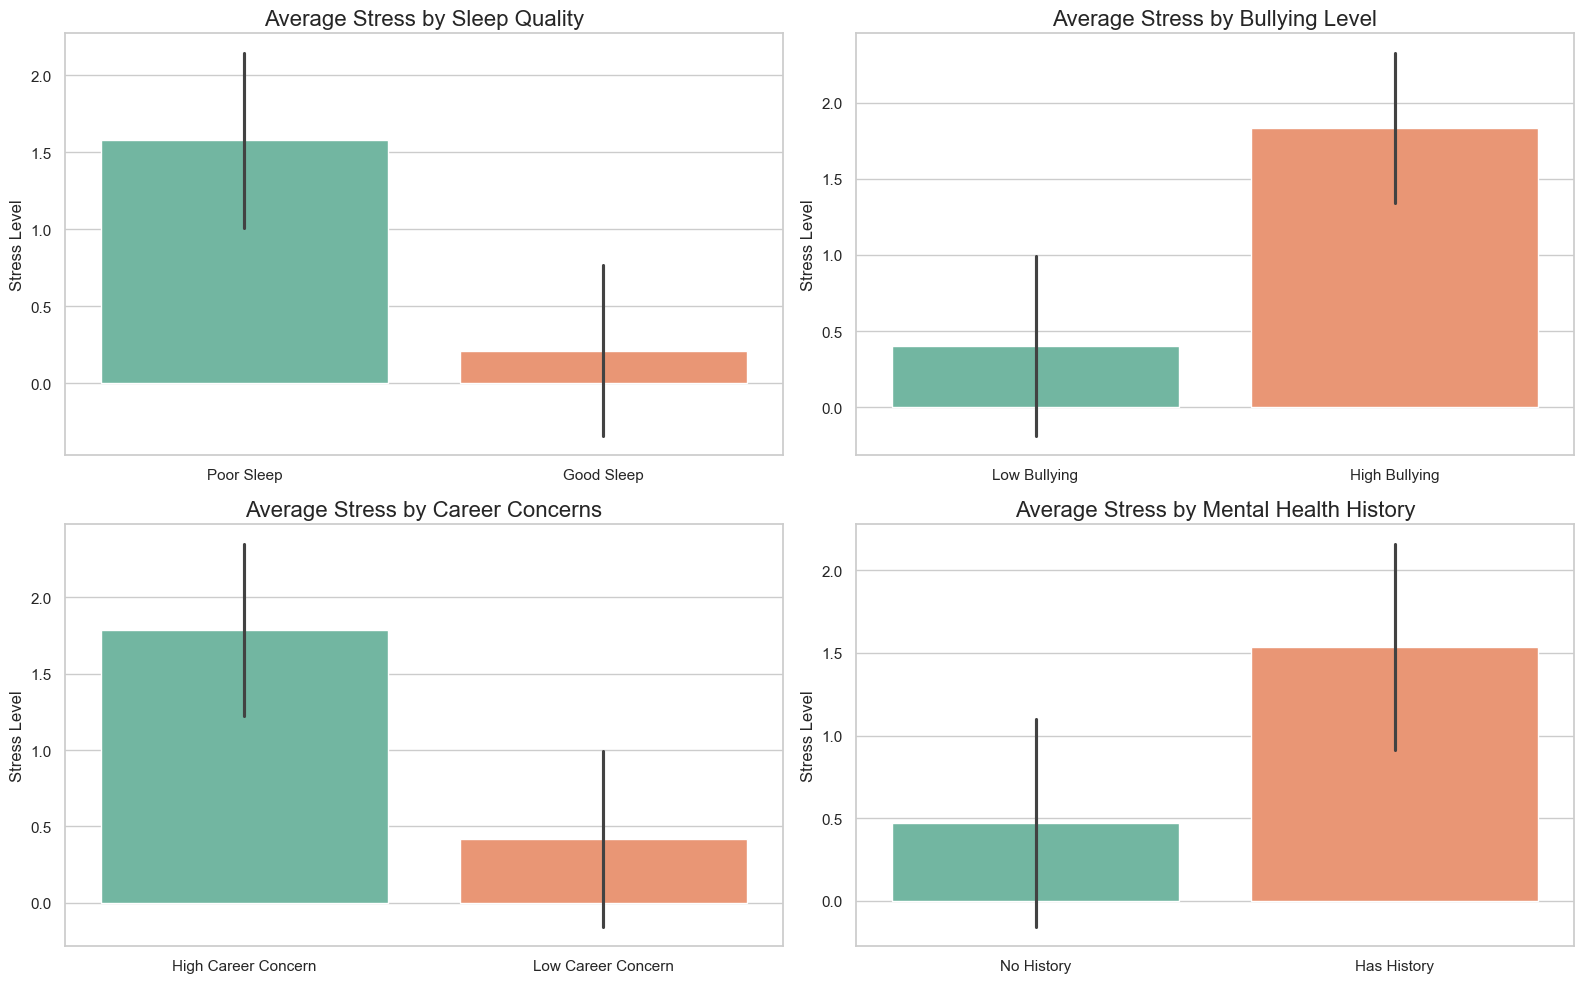

In [257]:
df = df_1  
df['sleep_group'] = df['sleep_quality'].apply(lambda x: 'Poor Sleep' if x in [1,2] else ('Good Sleep' if x in [4,5] else None))
df['bullying_group'] = df['bullying'].apply(lambda x: 'Low Bullying' if x in [1,2] else ('High Bullying' if x in [4,5] else None))
df['career_group'] = df['future_career_concerns'].apply(lambda x: 'Low Career Concern' if x in [1,2] else ('High Career Concern' if x in [4,5] else None))
df['mh_group'] = df['mental_health_history'].apply(lambda x: 'No History' if x == 0 else 'Has History')

plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.barplot(x='sleep_group', y='stress_level', data=df.dropna(subset=['sleep_group']), palette='Set2', ci='sd')
plt.title("Average Stress by Sleep Quality")
plt.xlabel("")
plt.ylabel("Stress Level")

plt.subplot(2, 2, 2)
sns.barplot(x='bullying_group', y='stress_level', data=df.dropna(subset=['bullying_group']), palette='Set2', ci='sd')
plt.title("Average Stress by Bullying Level")
plt.xlabel("")
plt.ylabel("Stress Level")

plt.subplot(2, 2, 3)
sns.barplot(x='career_group', y='stress_level', data=df.dropna(subset=['career_group']), palette='Set2', ci='sd')
plt.title("Average Stress by Career Concerns")
plt.xlabel("")
plt.ylabel("Stress Level")

plt.subplot(2, 2, 4)
sns.barplot(x='mh_group', y='stress_level', data=df.dropna(subset=['mh_group']), palette='Set2', ci='sd')
plt.title("Average Stress by Mental Health History")
plt.xlabel("")
plt.ylabel("Stress Level")

plt.tight_layout()
plt.show()

# ANOVA

In [248]:
df = df_1 
factors = [
    'study_load',
    'academic_performance',
    'depression',
    'peer_pressure',
    'living_conditions',
    'teacher_student_relationship'
]

anova_results = []

for factor in factors:
    groups = [
        df[df[factor] == level]['stress_level']
        for level in sorted(df[factor].unique())
    ]
    
    f_stat, p_val = stats.f_oneway(*groups)
    anova_results.append([factor, f_stat, p_val])

anova_df = pd.DataFrame(anova_results, columns=['Factor', 'F-statistic', 'p-value'])
anova_df

,Factor,F-statistic,p-value
0,study_load,211.262263,9.710472e-158
1,academic_performance,345.969540,2.503996e-222
2,depression,72.137141,3.147116e-219
3,peer_pressure,273.658863,7.630564e-190
4,living_conditions,240.039105,4.380039e-173
5,teacher_student_relationship,336.881111,1.761330e-218


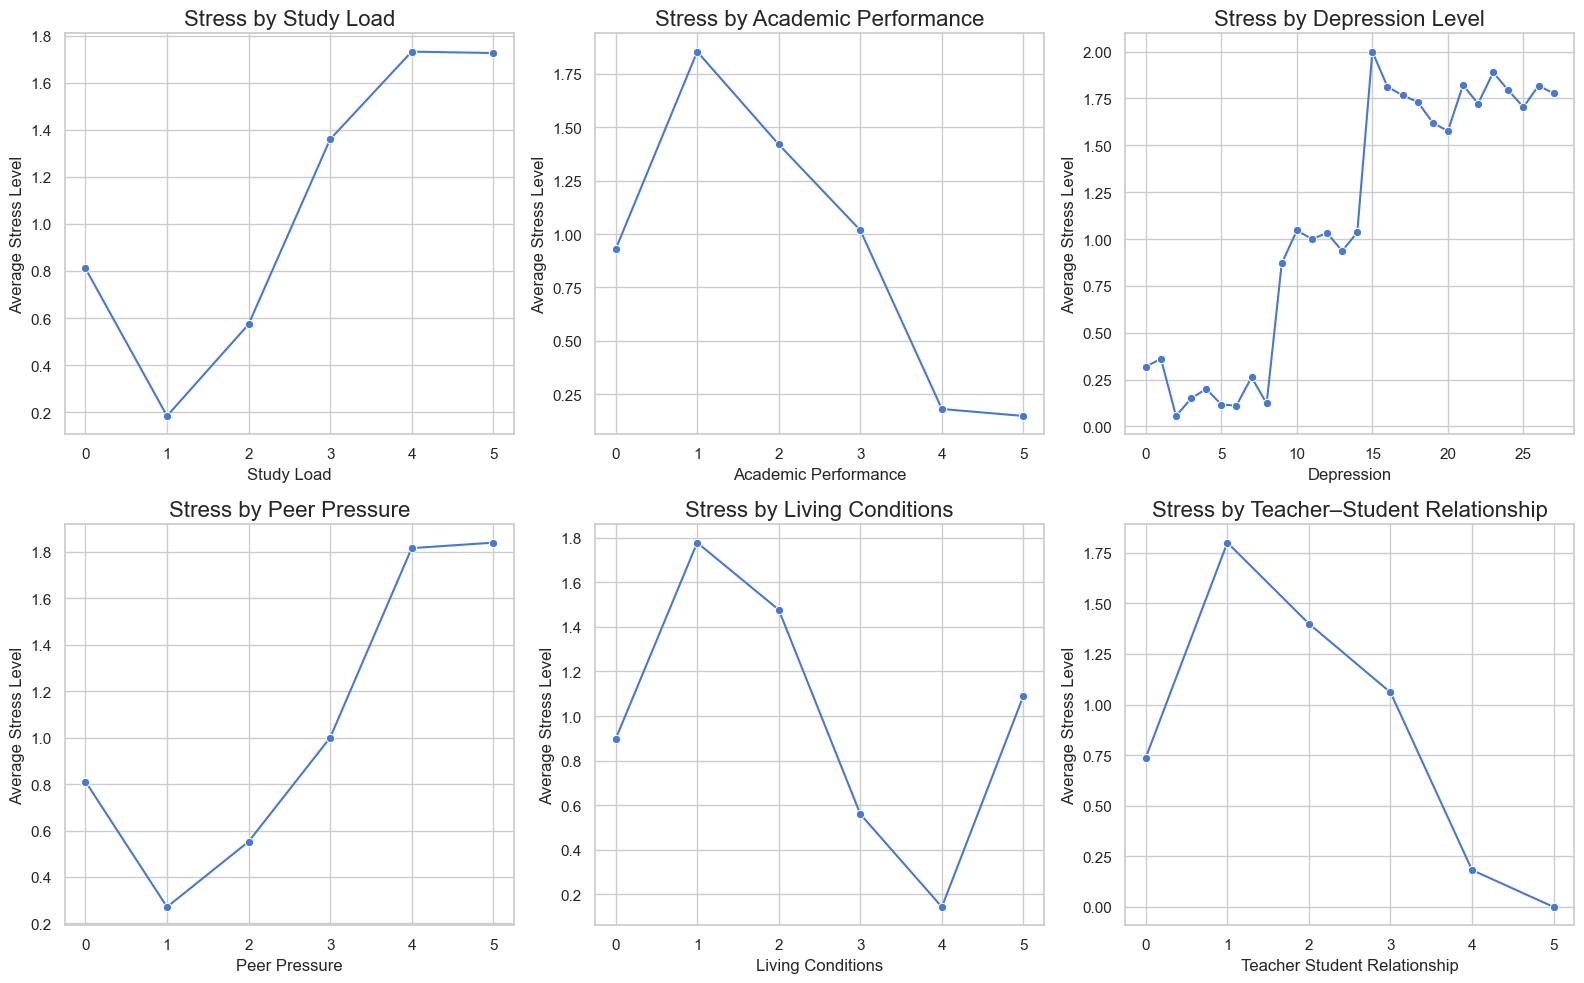

In [250]:
df = df_1  
factors = [
    'study_load',
    'academic_performance',
    'depression',
    'peer_pressure',
    'living_conditions',
    'teacher_student_relationship'
]

titles = [
    "Stress by Study Load",
    "Stress by Academic Performance",
    "Stress by Depression Level",
    "Stress by Peer Pressure",
    "Stress by Living Conditions",
    "Stress by Teacher–Student Relationship"
]

plt.figure(figsize=(16, 10))

for i, factor in enumerate(factors):
    avg_df = df.groupby(factor)['stress_level'].mean().reset_index()
    
    plt.subplot(2, 3, i+1)
    sns.lineplot(
        x=factor,
        y='stress_level',
        data=avg_df,
        marker='o'
    )
    plt.title(titles[i])
    plt.xlabel(factor.replace("_", " ").title())
    plt.ylabel("Average Stress Level")
    plt.grid(True)

plt.tight_layout()
plt.show()

# KMeans Clusters of Students Based on Stress-Related Factors

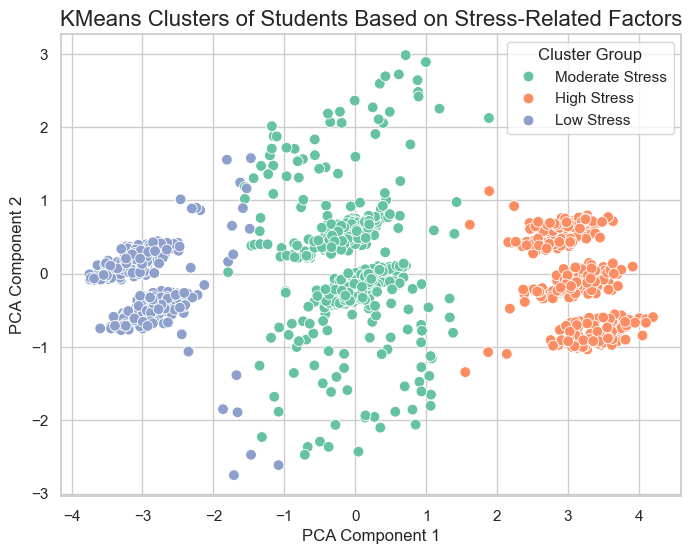

In [275]:
features = [
    'anxiety_level', 'depression', 'peer_pressure', 'sleep_quality',
    'academic_performance', 'future_career_concerns',
    'bullying', 'study_load'
]

X = df_1[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)
df_1['cluster'] = labels

pca = PCA(n_components=2)
pca_coords = pca.fit_transform(X_scaled)

df_1['PCA1'] = pca_coords[:, 0]
df_1['PCA2'] = pca_coords[:, 1]

cluster_names = {
    0: "Moderate Stress",
    1: "High Stress",
    2: "Low Stress"
}

df_1['cluster_label'] = df_1['cluster'].map(cluster_names)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='cluster_label',
    palette='Set2',
    data=df_1,
    s=60
)
plt.title("KMeans Clusters of Students Based on Stress-Related Factors")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster Group")
plt.show()